# Análisis vectorial de habilidades técnicas
Este notebook realiza el procesamiento y visualización de habilidades técnicas por carrera, optimizando los pasos para obtener el espacio vectorial y su reducción dimensional.

## 1. Importar librerías y cargar datos
Se importan las librerías necesarias y se cargan los textos de habilidades y descripciones de cada carrera en un diccionario para su análisis.

In [1]:
# 1. Importar librerías y cargar datos
import os
import pandas as pd
ruta_base = 'todas_las_plataformas'
columnas_texto = ['skills', 'description']
corpus_carreras = {}
for subcarpeta in os.listdir(ruta_base):
    ruta_subcarpeta = os.path.join(ruta_base, subcarpeta)
    archivo_objetivo = os.path.join(ruta_subcarpeta, f'{subcarpeta}_Merged.csv')
    if os.path.isfile(archivo_objetivo):
        try:
            df = pd.read_csv(archivo_objetivo, dtype=str)
        except Exception as e:
            print(f'Error leyendo {archivo_objetivo}: {e}')
            continue
        textos = []
        for col in columnas_texto:
            if col in df.columns:
                textos.extend(df[col].dropna().tolist())
        corpus_carreras[subcarpeta] = ' '.join(textos)
df_carreras = pd.DataFrame({'carrera': list(corpus_carreras.keys()), 'texto': list(corpus_carreras.values())})

In [2]:
df_carreras

,carrera,texto
0,Administración_de_Empresas,"Servicio al cliente, Ventas, Gestión de efecti..."
1,Agroindustria,Cualquier desviación debe comunicarse al super...
2,Ciencia_de_Datos,Más de 3 años de experiencia en desarrollo de ...
3,Computación,"En general, estamos buscando un miembro del eq..."
4,Economía,"Sobresalir, Inteligencia de negocios, Power Bi..."
5,Electricidad,2 anos de experiencia minima como montador (pr...
6,Electrónica_y_Automatización,El candidato ideal tendrá experiencia en trata...
7,Física,Licenciatura y mínimo 9 años de experiencia re...
8,Geología,Grado avanzado (maestría o doctorado) en geolo...
9,Ingeniería_Ambiental,"Una licenciatura en un campo científico, de in..."


#### Distribución de ofertas laborales por carrera
El gráfico de pastel muestra la proporción de ofertas laborales disponibles para cada carrera en el corpus analizado.
Esta visualización permite identificar posibles sesgos en los datos, ya que algunas carreras pueden estar sobrerrepresentadas respecto a otras.
Un corpus sesgado puede afectar el análisis de habilidades técnicas, generando resultados menos representativos para carreras con menor cantidad de ofertas.
La distribución desigual puede deberse a factores como la demanda laboral, la disponibilidad de datos o el proceso de recolección.

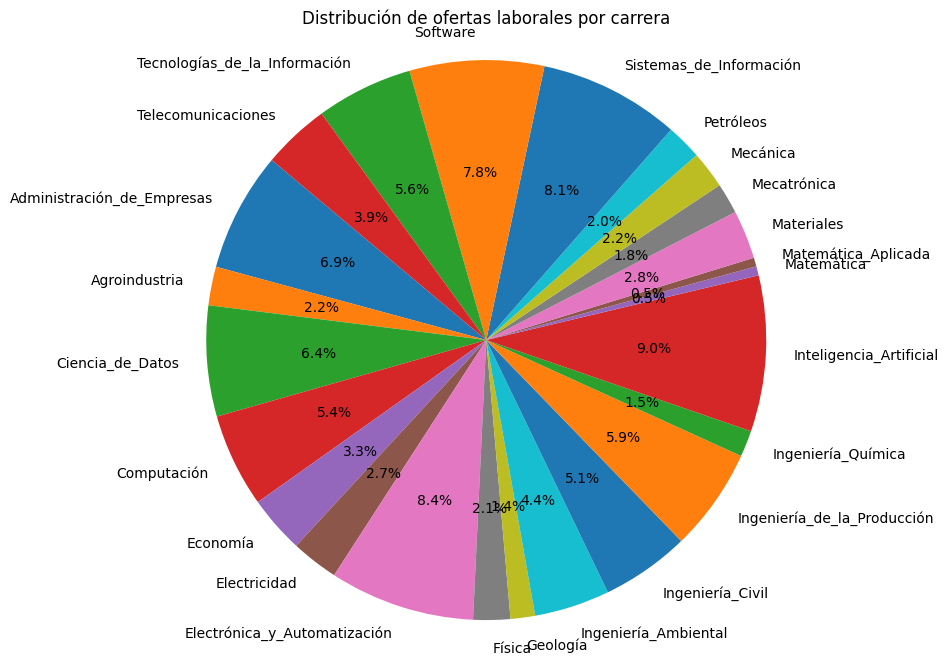

In [3]:
# Gráfica de pastel: número de ofertas laborales por carrera
import matplotlib.pyplot as plt
ofertas_por_carrera = {}
for subcarpeta in os.listdir(ruta_base):
    ruta_subcarpeta = os.path.join(ruta_base, subcarpeta)
    archivo_objetivo = os.path.join(ruta_subcarpeta, f'{subcarpeta}_Merged.csv')
    if os.path.isfile(archivo_objetivo):
        try:
            df = pd.read_csv(archivo_objetivo, dtype=str)
            ofertas_por_carrera[subcarpeta] = len(df)
        except Exception as e:
            print(f'Error leyendo {archivo_objetivo}: {e}')
plt.figure(figsize=(10,8))
plt.pie(list(ofertas_por_carrera.values()), labels=list(ofertas_por_carrera.keys()), autopct='%1.1f%%', startangle=140)
plt.title('Distribución de ofertas laborales por carrera')
plt.axis('equal')
plt.show()

## 2. Definir whitelist de habilidades técnicas
Se define una lista de habilidades técnicas relevantes para todas las carreras, que será usada como vocabulario en el análisis.

In [4]:
# 2. Definir whitelist de habilidades técnicas
whitelist = {
    # Administracion de Empresas
    'excel', 'erp', 'project management', 'contabilidad', 'finanzas', 'marketing', 'gestión de recursos humanos', 'análisis financiero', 'planificación estratégica', 'costos', 'presupuestos', 'negociación', 'comercio exterior', 'logística', 'supply chain', 'crm', 'ventas', 'administración de empresas',
    # Agroindustria
    'normas iso', 'producción', 'control de plagas', 'buenas prácticas agrícolas', 'procesamiento de alimentos', 'agronomía', 'fertilización', 'riego', 'postcosecha', 'biotecnología', 'fitopatología', 'agroindustria', 'trazabilidad',
    # Ciencia de Datos
    'python', 'machine learning', 'data analysis', 'sql', 'r', 'big data', 'visualización de datos', 'estadística', 'deep learning', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'data mining', 'análisis predictivo', 'regresión', 'clasificación', 'clustering', 'etl', 'modelado de datos', 'inteligencia artificial', 'análisis exploratorio', 'data science',
    # Computación
    'java', 'python', 'linux', 'git', 'algoritmos', 'estructura de datos', 'sistemas operativos', 'redes', 'seguridad informática', 'desarrollo web', 'html', 'css', 'javascript', 'php', 'sql', 'arquitectura de computadoras', 'compiladores', 'base de datos', 'ingeniería de software', 'testing', 'uml', 'scrum', 'devops',
    # Economía
    'econometría', 'estadística', 'finanzas', 'análisis de datos', 'excel', 'microeconomía', 'macroeconomía', 'modelos econométricos', 'análisis financiero', 'gestión de riesgos', 'mercados financieros', 'política económica', 'economía internacional', 'teoría de juegos', 'pronósticos', 'costos', 'presupuestos',
    # Electricidad
    'circuitos', 'electrónica', 'automatización', 'plc', 'motores eléctricos', 'instalaciones eléctricas', 'protecciones eléctricas', 'energía renovable', 'diseño eléctrico', 'subestaciones', 'mediciones eléctricas', 'generación eléctrica', 'distribución eléctrica', 'transformadores',
    # Electrónica y Automatización
    'plc', 'sensores', 'microcontroladores', 'automatización', 'circuitos', 'arduino', 'raspberry pi', 'robotica', 'sistemas embebidos', 'instrumentación', 'control automático', 'electrónica digital', 'electrónica analógica', 'scada', 'diseño de pcb', 'fpga', 'vhdl', 'proteus',
    # Física
    'simulación', 'matlab', 'python', 'análisis de datos', 'modelado', 'cálculo numérico', 'física computacional', 'teoría cuántica', 'óptica', 'mecánica clásica', 'termodinámica', 'electromagnetismo', 'análisis estadístico', 'instrumentación científica', 'latex',
    # Geología
    'gis', 'cartografía', 'sensores remotos', 'estratigrafía', 'geofísica', 'geotecnia', 'hidrogeología', 'mineralogía', 'mapeo geológico', 'modelado geológico', 'arcgis', 'qgis', 'geología estructural', 'geoquímica',
    # Ingeniería Ambiental
    'iso 14001', 'impacto ambiental', 'tratamiento de aguas', 'gis', 'normas ambientales', 'auditoría ambiental', 'gestión ambiental', 'residuos sólidos', 'remediación', 'evaluación ambiental', 'modelado ambiental', 'sustentabilidad', 'legislación ambiental', 'educación ambiental',
    # Ingeniería Civil
    'autocad', 'sap2000', 'estructuras', 'topografía', 'cype', 'civil 3d', 'revit', 'diseño estructural', 'hormigón armado', 'cálculo estructural', 'gestión de obras', 'presupuestos', 'planificación de obras', 'geotecnia', 'hidráulica', 'vialidad', 'urbanismo',
    # Ingeniería de la Producción
    'lean manufacturing', 'six sigma', 'producción', 'erp', 'gestión de calidad', 'logística', 'supply chain', 'kaizen', 'just in time', 'mantenimiento industrial', 'planificación de la producción', 'optimización de procesos', 'simulación de procesos', 'costos industriales', 'mejora continua',
    # Ingeniería Química
    'procesos químicos', 'simulación', 'hysys', 'laboratorio', 'química analítica', 'balances de materia y energía', 'cromatografía', 'diseño de plantas', 'control de procesos', 'termodinámica química', 'ingeniería de procesos', 'análisis instrumental',
    # Inteligencia Artificial
    'machine learning', 'deep learning', 'python', 'nlp', 'tensorflow', 'pytorch', 'redes neuronales', 'aprendizaje supervisado', 'aprendizaje no supervisado', 'procesamiento de lenguaje natural', 'scikit-learn', 'keras', 'inteligencia artificial', 'data mining',
    # Matemática
    'matlab', 'python', 'estadística', 'modelado', 'optimización', 'análisis numérico', 'ecuaciones diferenciales', 'probabilidad', 'teoría de números', 'álgebra lineal', 'cálculo', 'matemática aplicada', 'simulación',
    # Matemática Aplicada
    'matlab', 'python', 'estadística', 'simulación', 'optimización', 'análisis numérico', 'modelado matemático', 'ecuaciones diferenciales', 'cálculo', 'programación matemática',
    # Materiales
    'caracterización', 'microscopía', 'ensayos mecánicos', 'simulación', 'laboratorio', 'metalografía', 'tratamientos térmicos', 'corrosión', 'análisis de materiales', 'propiedades mecánicas', 'microscopía electrónica',
    # Mecánica
    'solidworks', 'autocad', 'mecánica de materiales', 'catia', 'simulación', 'diseño mecánico', 'manufactura', 'elementos finitos', 'dinámica', 'termodinámica', 'cálculo estructural', 'prototipado', 'mantenimiento industrial',
    # Mecatrónica
    'plc', 'robotica', 'automatización', 'sensores', 'microcontroladores', 'sistemas embebidos', 'control automático', 'diseño mecánico', 'instrumentación', 'arduino', 'raspberry pi', 'vision artificial',
    # Petróleos
    'reservorios', 'perforación', 'simulación', 'petrel', 'ingeniería de yacimientos', 'geomecánica', 'ingeniería de perforación', 'producción petrolera', 'modelado de reservorios', 'ingeniería de producción',
    # Sistemas de Información
    'sql', 'erp', 'power bi', 'python', 'gestión de datos', 'business intelligence', 'data warehouse', 'etl', 'visualización de datos', 'base de datos', 'análisis de sistemas', 'sistemas de información',
    # Software
    'python', 'java', 'git', 'javascript', 'typescript', 'html', 'css', 'react', 'node.js', 'desarrollo web', 'scrum', 'uml', 'testing', 'devops', 'docker', 'api', 'rest', 'php',
    # Tecnologías de la Información
    'sql', 'cloud computing', 'python', 'linux', 'ciberseguridad', 'virtualización', 'redes', 'windows server', 'azure', 'aws', 'soporte técnico', 'seguridad informática', 'sistemas operativos', 'backup', 'firewall', 'vpn',
    # Telecomunicaciones
    'redes', 'cisco', 'fibra óptica', 'wireless', 'comunicaciones digitales', 'telefonía ip', 'microondas', 'radioenlaces', 'lte', 'routing', 'switching', 'voz sobre ip', 'protocolos de comunicación',
}
habilidades = sorted([h.lower() for h in whitelist])

## 3. Construir matriz término-documento
Se crea una matriz donde cada fila es una habilidad y cada columna una carrera. El valor es la frecuencia de la habilidad en los textos de cada carrera.

In [5]:
# 3. Construir matriz término-documento (habilidad-carrera)
from sklearn.feature_extraction.text import CountVectorizer
carreras = list(corpus_carreras.keys())
corpus = [corpus_carreras[c].lower() for c in carreras]
vectorizer = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X = vectorizer.fit_transform(corpus)
matriz_td = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names_out(), columns=carreras)

In [6]:
matriz_td

,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
administración de empresas,164,7,11,10,11,3,13,2,3,25,...,0,0,7,2,2,1,22,0,15,12
agroindustria,0,36,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
agronomía,1,8,0,0,2,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
algoritmos,0,0,77,6,0,0,0,0,0,0,...,0,1,0,8,0,0,2,195,0,7
análisis de datos,23,2,182,21,8,0,3,2,1,14,...,4,6,10,6,3,2,114,99,39,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vpn,8,0,0,4,2,1,3,3,0,0,...,0,1,0,0,0,0,13,22,27,58
windows server,4,0,0,2,0,0,0,0,0,3,...,0,0,0,0,0,0,19,13,29,16
wireless,3,0,5,0,0,0,2,0,0,0,...,0,0,0,1,0,1,11,37,9,34
álgebra lineal,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0


## 4. Agrupar habilidades con n-gramas y embeddings
Se agrupan habilidades similares usando n-gramas y embeddings para reducir la dimensionalidad y mejorar la representación de las competencias técnicas.

In [7]:
# 4. Agrupar habilidades con n-gramas y embeddings
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
import hdbscan
from collections import defaultdict
def generar_ngrams(termino):
    palabras = termino.split()
    ngrams = []
    if len(palabras) == 1:
        ngrams.append(termino)
    else:
        for n in [2, 3]:
            ngrams += [' '.join(palabras[i:i+n]) for i in range(len(palabras)-n+1)]
        ngrams.append(termino)
    return ngrams
habilidades_ngrams = []
hab_to_ngrams = {}
for h in habilidades:
    ngrams = generar_ngrams(h)
    habilidades_ngrams.extend(ngrams)
    hab_to_ngrams[h] = ngrams
habilidades_ngrams = list(set(habilidades_ngrams))
modelo_bge_ngram = SentenceTransformer('BAAI/bge-m3')
embeddings_bge_ngrams = modelo_bge_ngram.encode(habilidades_ngrams)
emb_norm = normalize(embeddings_bge_ngrams)
clusterer_bge_ngram = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
labels_bge_ngrams = clusterer_bge_ngram.fit_predict(emb_norm)
grupos_bge_ngram = defaultdict(list)
gram_to_label_bge = {ng: label for ng, label in zip(habilidades_ngrams, labels_bge_ngrams) if label != -1}
for h, ngrams in hab_to_ngrams.items():
    etiquetas = [gram_to_label_bge[ng] for ng in ngrams if ng in gram_to_label_bge]
    if etiquetas:
        label = max(set(etiquetas), key=etiquetas.count)
        grupos_bge_ngram[label].append(h)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\

## 5. Construir matriz término-documento por grupos
Se reconstruye la matriz usando los grupos de habilidades obtenidos, para comparar carreras en un espacio vectorial reducido.

In [8]:
# 5. Construir matriz término-documento por grupos
matriz_td_emb = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=matriz_td.columns)
for label, terms in grupos_bge_ngram.items():
    matriz_td_emb.loc[label] = matriz_td.loc[terms].sum()
matriz_td_emb.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]

In [9]:
matriz_td_emb

,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
"administración de empresas, gestión de calidad, gestión de datos ...",184,14,66,38,12,9,13,3,8,58,...,0,1,10,8,2,1,163,54,59,28
"agroindustria, agronomía",1,44,0,0,2,3,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
"análisis de datos, análisis de materiales, análisis de sistemas ...",34,3,296,72,9,0,6,4,1,15,...,28,10,15,8,4,4,207,220,53,19
"aprendizaje no supervisado, aprendizaje supervisado",0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"arcgis, qgis",1,0,2,0,2,0,0,0,0,4,...,0,0,0,0,1,0,3,26,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"telefonía ip, voz sobre ip",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,11
"teoría cuántica, teoría de juegos, teoría de números",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"termodinámica, termodinámica química",0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,3,1,0,0,0,1
"tratamiento de aguas, tratamientos térmicos",0,0,0,0,0,3,3,0,1,7,...,0,0,1,0,1,0,1,0,0,0


## 6. Calcular matriz TF-IDF por grupos
Se calcula la importancia relativa de cada grupo de habilidades en cada carrera usando la técnica TF-IDF.

In [10]:
# 6. Calcular matriz TF-IDF por grupos
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_emb = TfidfTransformer(norm='l2').fit_transform(matriz_td_emb.values)
tfidf_emb_df = pd.DataFrame(tfidf_emb.toarray(), index=matriz_td_emb.index, columns=matriz_td_emb.columns)
espacio_vectorial_tfidf = tfidf_emb_df.T

In [ ]:
espacio_vectorial_tfidf

,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de materiales, análisis de sistemas ...","aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"aws, wireless",balances de materia y energía,base de datos,buenas prácticas agrícolas,...,"react, reactores, transformadores","redes, redes neuronales","sensores, sensores remotos","simulación, simulación de procesos",sistemas de información,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos
Administración_de_Empresas,0.684985,0.020605,0.083950,0.000000,0.031685,0.0,0.005752,0.0,0.250062,0.0,...,0.000954,0.043895,0.000000,0.000000,0.050648,0.000000,0.0,0.000000,0.000000,0.000000
Agroindustria,0.056882,0.989506,0.008084,0.000000,0.000000,0.0,0.000000,0.0,0.009097,1.0,...,0.001041,0.004413,0.000000,0.029916,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Ciencia_de_Datos,0.212188,0.000000,0.631170,0.973694,0.054726,0.0,0.062535,0.0,0.208756,0.0,...,0.023071,0.032920,0.089860,0.165701,0.145798,0.000000,1.0,0.000000,0.000000,0.873252
Computación,0.141464,0.000000,0.177776,0.000000,0.000000,1.0,0.060230,0.0,0.141702,0.0,...,0.010495,0.041585,0.000000,0.000000,0.236355,0.103473,0.0,0.000000,0.000000,0.073540
Economía,0.050577,0.046658,0.025159,0.000000,0.071745,0.0,0.001532,0.0,0.009437,0.0,...,0.001080,0.001308,0.039268,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Electricidad,0.032397,0.059773,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.008060,0.0,...,0.023987,0.015637,0.402453,0.000000,0.016325,0.000000,0.0,0.000000,0.209295,0.000000
Electrónica_y_Automatización,0.043836,0.018664,0.013419,0.000000,0.000000,0.0,0.003984,0.0,0.015100,0.0,...,0.007778,0.027727,0.251327,0.024828,0.015292,0.000000,0.0,0.000000,0.196053,0.016653
Física,0.012189,0.000000,0.010779,0.000000,0.000000,0.0,0.000739,0.0,0.018195,0.0,...,0.000000,0.006304,0.000000,0.119662,0.018426,0.000000,0.0,0.000000,0.000000,0.000000
Geología,0.036420,0.000000,0.003019,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.002825,0.000000,0.000000,0.020645,0.000000,0.0,0.000000,0.088231,0.000000
Ingeniería_Ambiental,0.202014,0.019278,0.034651,0.000000,0.118577,0.0,0.002533,0.0,0.023396,0.0,...,0.000893,0.008106,0.000000,0.025645,0.031590,0.000000,0.0,0.244172,0.472520,0.000000


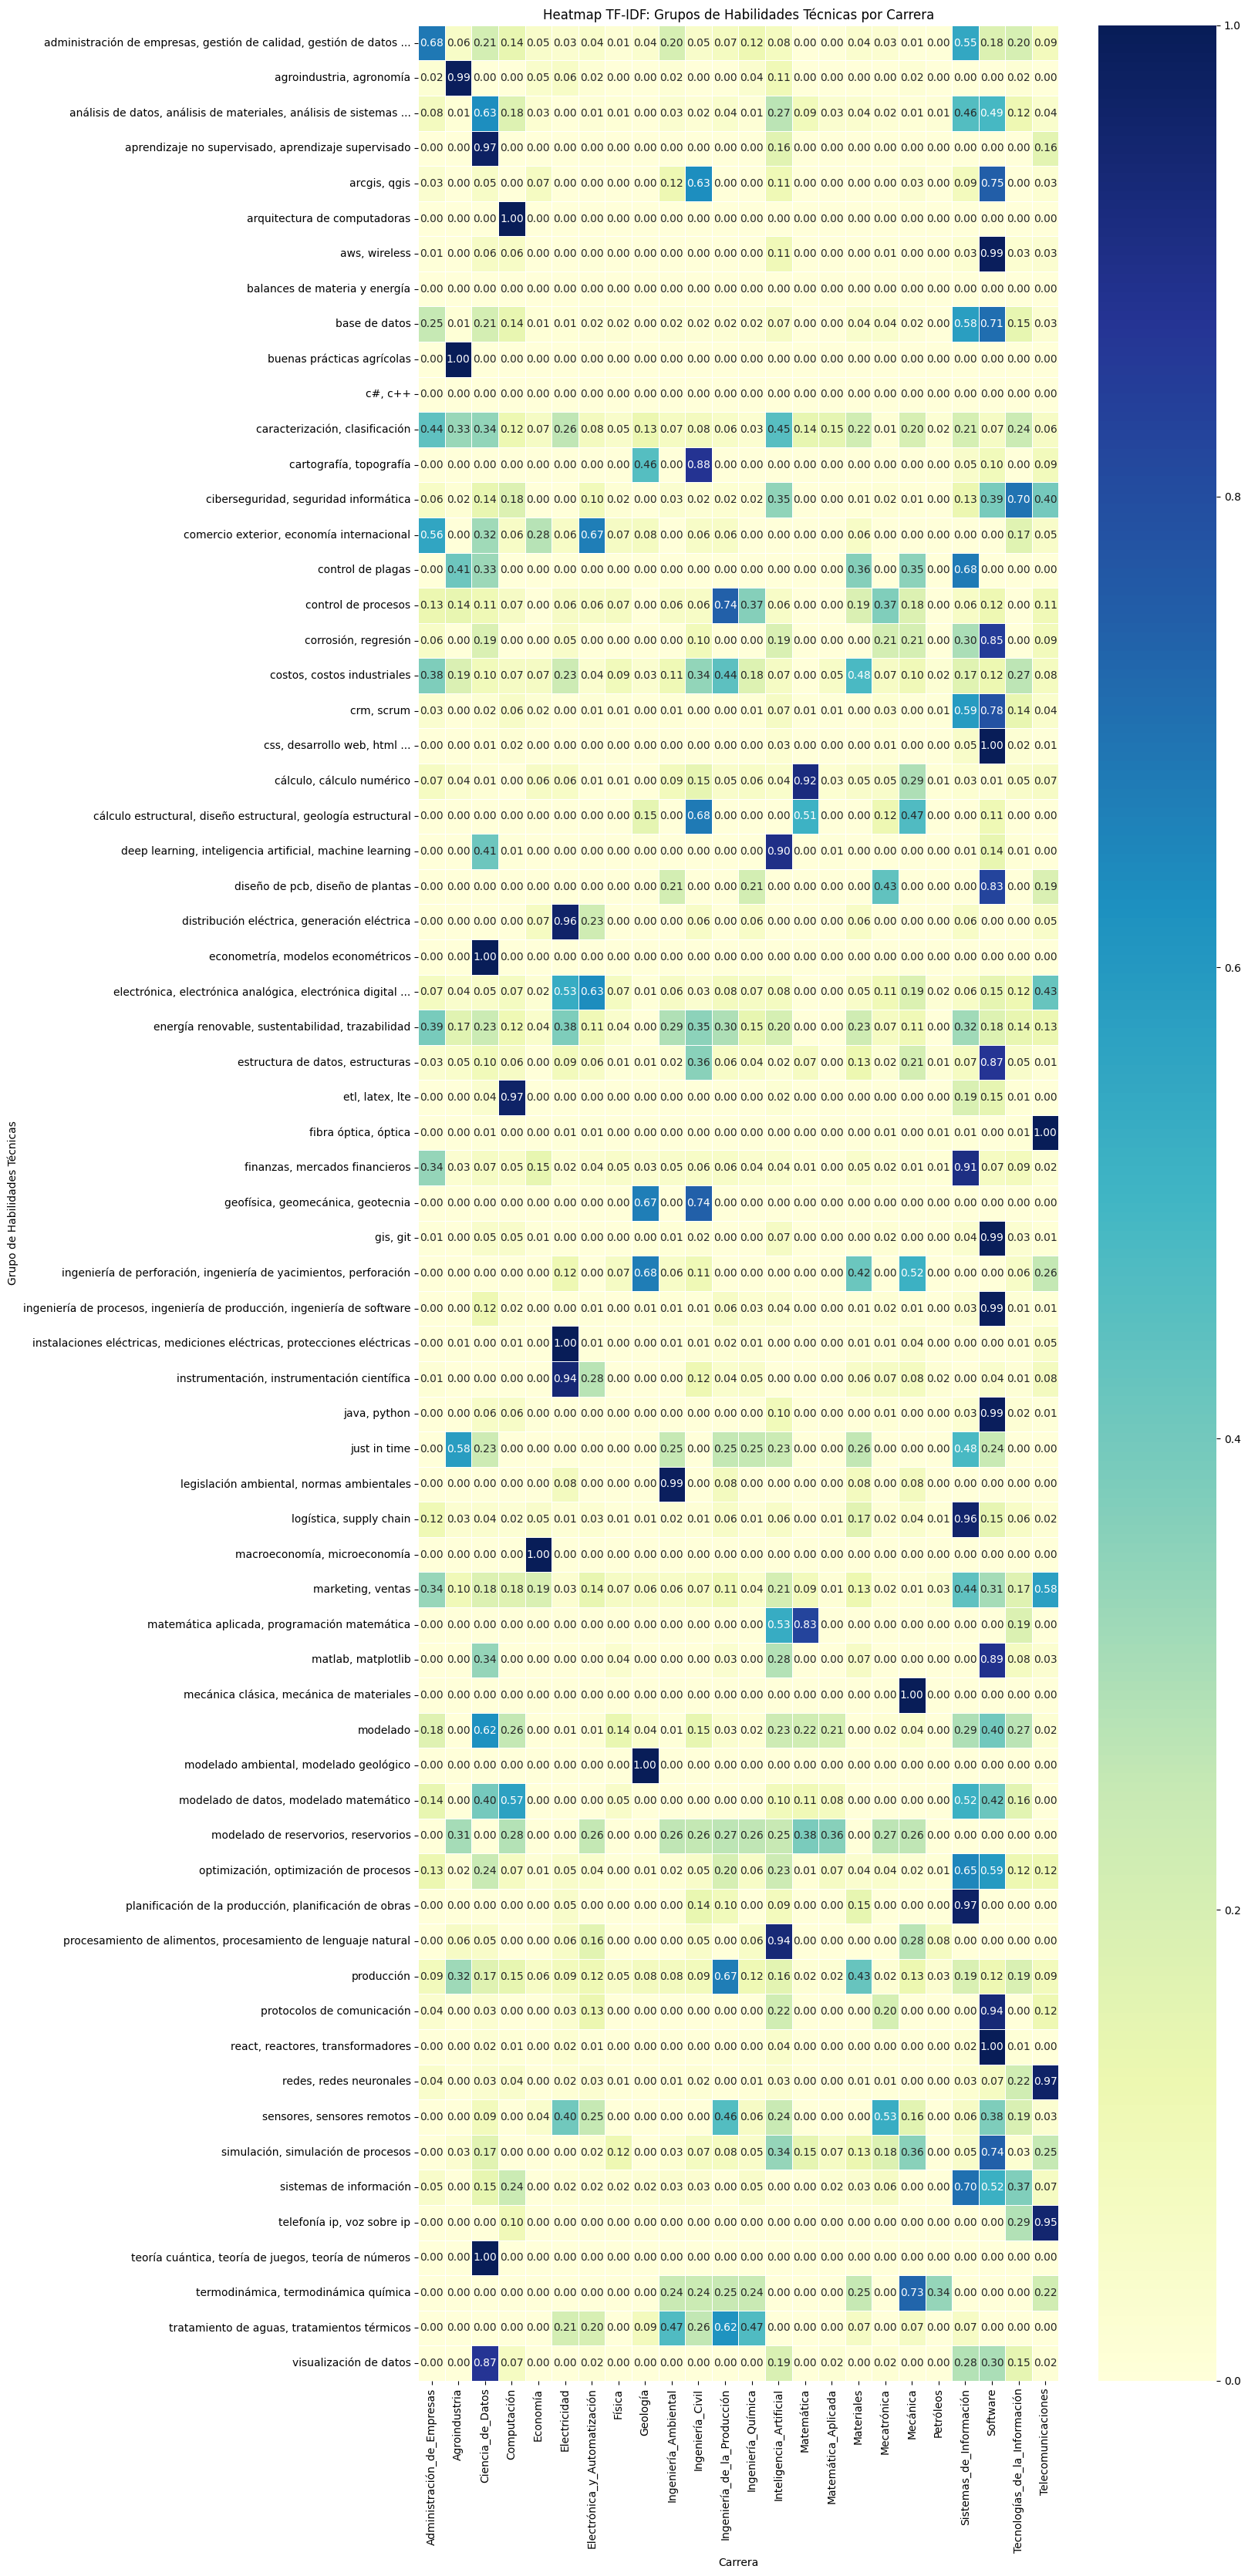

In [ ]:
# Heatmap de la matriz TF-IDF por Grupos de Habilidades Técnicas y Carrera
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, max(6, len(tfidf_emb_df)*0.5)))
sns.heatmap(tfidf_emb_df, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap TF-IDF: Grupos de Habilidades Técnicas por Carrera')
plt.xlabel('Carrera')
plt.ylabel('Grupo de Habilidades Técnicas')
plt.tight_layout()
plt.show()

## 7. Visualización PCA y UMAP de carreras
Se proyectan las carreras en dos dimensiones usando PCA y UMAP para comparar visualmente los perfiles técnicos y sus similitudes.

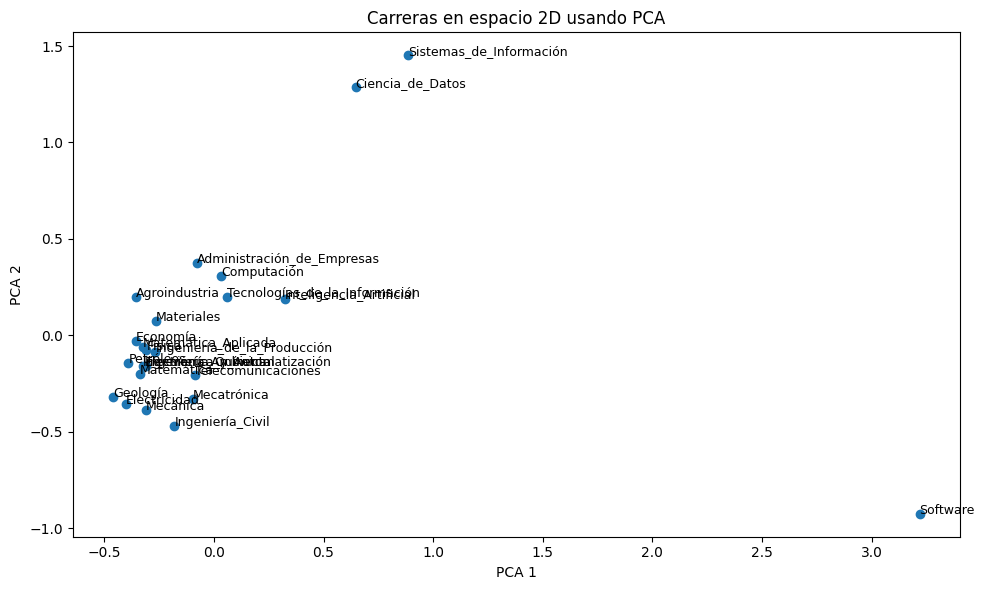

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


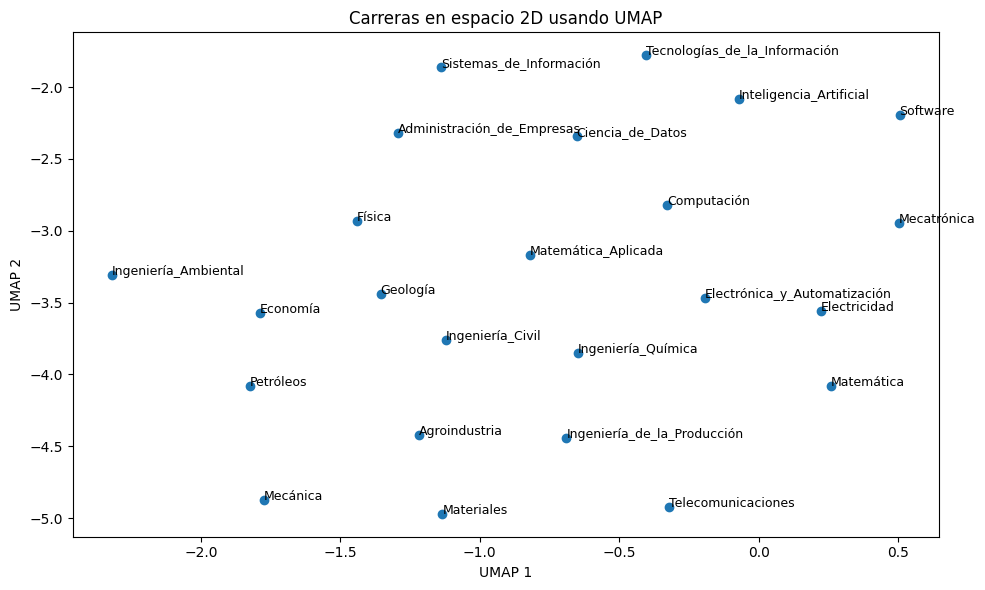

In [ ]:
# 7. Visualización PCA y UMAP de carreras
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(espacio_vectorial_tfidf.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1])
for i, carrera in enumerate(espacio_vectorial_tfidf.index):
    plt.text(pca_result[i,0], pca_result[i,1], carrera, fontsize=9)
plt.title('Carreras en espacio 2D usando PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()
# UMAP
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(espacio_vectorial_tfidf.values)
plt.figure(figsize=(10,6))
plt.scatter(umap_result[:,0], umap_result[:,1])
for i, carrera in enumerate(espacio_vectorial_tfidf.index):
    plt.text(umap_result[i,0], umap_result[i,1], carrera, fontsize=9)
plt.title('Carreras en espacio 2D usando UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

## 8. Extracción de información de carreras EPN
Se extrae y organiza la información relevante de cada carrera desde el archivo 'carreras_epn.csv'. Se combinan los campos descriptivos en un solo texto para cada carrera, facilitando el análisis posterior.

In [ ]:
# Extraer información de carreras_epn/carreras_epn.csv en un DataFrame con columnas 'carrera' y 'texto'
import pandas as pd
ruta_csv = 'carreras_epn/carreras_epn.csv'
df_epn = pd.read_csv(ruta_csv, dtype=str)
columnas_texto = ['descripcion', 'objetivos', 'perfil_egreso', 'perfil_profesional']
df_epn['texto'] = df_epn[columnas_texto].fillna('').agg(' '.join, axis=1)
df_epn_final = df_epn[['nombre', 'texto']].rename(columns={'nombre': 'carrera'})
df_epn_final

,carrera,texto
0,Licenciatura Administracion De Empresas,En la Licenciatura en Administración de Empres...
1,Ingenieria Agroindustria,La carrera de Agroindustria tiene como propósi...
2,Ingenieria Ambiental,Una profesión que enfrenta el desafío de mitig...
3,Ciencias De Datos E Inteligencia Artificial,La Carrera en Ciencia de Datos e Inteligencia ...
4,Ingenieria En Ciencias De La Computacion,La Carrera de Seguridad de Tecnologías de la I...
5,Economia,La carrera de Economía tiene como objetivo for...
6,Ingenieria En Electricidad,La Carrera de Seguridad de Tecnologías de la I...
7,Ingenieria En Electronica Y Automatizacion,La Carrera de Electrónica y Automatización est...
8,Fisica,La carrera de Física tiene como objetivo forma...
9,Ingenieria En Geologia,Los geólogos son especialistas en la investiga...


In [ ]:
# Transformar carreras EPN al espacio vectorial de los 67 grupos de habilidades técnicas
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Usar el mismo vocabulario de habilidades y los mismos grupos creados previamente
vectorizer_epn = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
corpus_epn = df_epn_final['texto'].str.lower().tolist()
X_epn = vectorizer_epn.transform(corpus_epn)
matriz_td_epn = pd.DataFrame(X_epn.T.toarray(), index=vectorizer_epn.get_feature_names_out(), columns=df_epn_final['carrera'])
# Construir matriz de 67 dimensiones (grupos) para las carreras EPN
matriz_epn_67d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=matriz_td_epn.columns)
for label, terms in grupos_bge_ngram.items():
    matriz_epn_67d.loc[label] = matriz_td_epn.loc[terms].sum()
matriz_epn_67d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
# Transformar a espacio TF-IDF (usando el mismo transformer que para las carreras laborales)
tfidf_epn = TfidfTransformer(norm='l2').fit(matriz_epn_67d.values)
tfidf_epn_67d = pd.DataFrame(tfidf_epn.transform(matriz_epn_67d.values).toarray(), index=matriz_epn_67d.index, columns=matriz_epn_67d.columns)
tfidf_epn_67d.T

,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de materiales, análisis de sistemas ...","aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"aws, wireless",balances de materia y energía,base de datos,buenas prácticas agrícolas,...,"react, reactores, transformadores","redes, redes neuronales","sensores, sensores remotos","simulación, simulación de procesos",sistemas de información,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos
carrera,,,,,,,,,,,,,,,,,,,,,
Licenciatura Administracion De Empresas,0.761838,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ingenieria Agroindustria,0.000000,1.0,0.180027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ingenieria Ambiental,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ciencias De Datos E Inteligencia Artificial,0.000000,0.0,0.788556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ingenieria En Ciencias De La Computacion,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213653,0.0,0.000000,0.119007,0.0,0.0,0.000000,0.0,0.0
Economia,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ingenieria En Electricidad,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.112508,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Ingenieria En Electronica Y Automatizacion,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Fisica,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


## 9. Comparación PCA: Carrera vs Mercado laboral (Facultad de Sistemas)
En este análisis se proyecta en un gráfico PCA el vector académico de una carrera específica junto con los vectores de ofertas laborales del mercado para esa misma carrera. La visualización permite comparar de manera general la alineación entre la formación académica y la demanda laboral, identificando similitudes y diferencias en el perfil de habilidades técnicas. Este método puede aplicarse a cualquier carrera de la Facultad de Sistemas para evaluar el grado de correspondencia entre lo que se enseña y lo que se requiere en el mercado laboral.

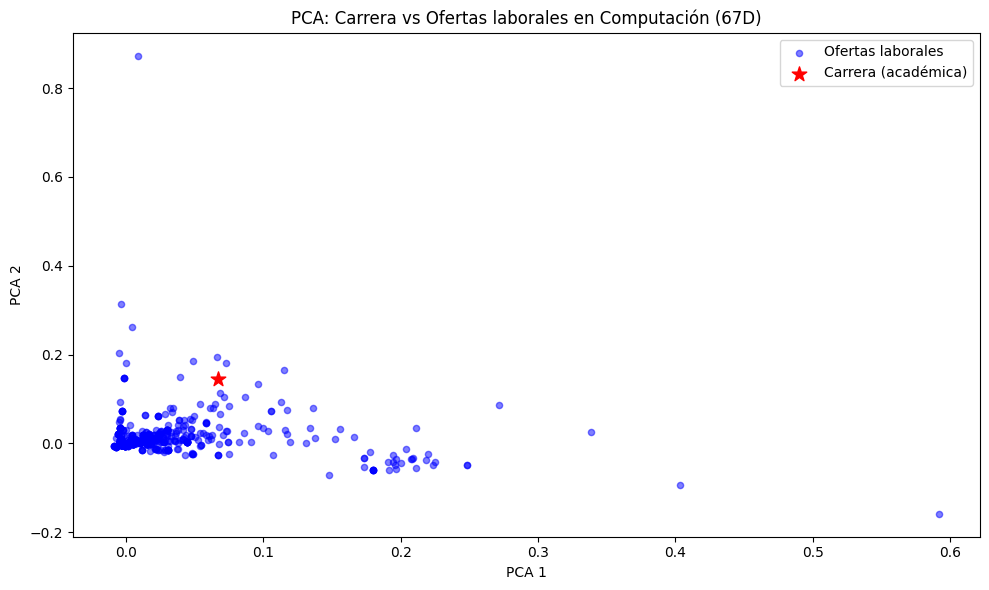

In [ ]:
# Visualización PCA: Carrera vs Ofertas laborales en Computación (67 dimensiones)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
# Vector académico de la carrera
vector_carrera = tfidf_epn_67d.T.loc[['Ingenieria En Ciencias De La Computacion']]
# Cargar ofertas laborales de computación y vectorizarlas en 67 dimensiones
df_comp = pd.read_csv('todas_las_plataformas/Computación/Computación_Merged.csv', dtype=str)
textos_comp = df_comp[['skills','description']].fillna('').agg(' '.join, axis=1).str.lower().tolist()
vectorizer_comp = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X_comp = vectorizer_comp.transform(textos_comp)
matriz_td_comp = pd.DataFrame(X_comp.T.toarray(), index=vectorizer_comp.get_feature_names_out())
matriz_comp_67d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=range(len(textos_comp)))
for label, terms in grupos_bge_ngram.items():
    matriz_comp_67d.loc[label] = matriz_td_comp.loc[terms].sum(axis=0)
matriz_comp_67d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
tfidf_transformer = TfidfTransformer(norm='l2').fit(matriz_comp_67d.values)
tfidf_comp_67d = pd.DataFrame(tfidf_transformer.transform(matriz_comp_67d.values).toarray(), index=matriz_comp_67d.index, columns=matriz_comp_67d.columns).T
# Unir carrera y ofertas laborales
df_pca = pd.concat([vector_carrera, tfidf_comp_67d], ignore_index=True)
# PCA a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result[1:,0], pca_result[1:,1], c='blue', label='Ofertas laborales', s=20, alpha=0.5)
plt.scatter(pca_result[0,0], pca_result[0,1], c='red', label='Carrera (académica)', s=120, marker='*')
plt.legend()
plt.title('PCA: Carrera vs Ofertas laborales en Computación (67D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

In [ ]:
# Distancia promedio entre vector académico y ofertas laborales (Computación)
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import numpy as np
# Vector académico
vector_carrera = tfidf_epn_67d.T.loc[["Ingenieria En Ciencias De La Computacion"]].values
# Vectores de ofertas laborales
vectores_ofertas = tfidf_comp_67d.values
# Coseno
distancias_coseno = cosine_distances(vector_carrera, vectores_ofertas)[0]
distancia_promedio_coseno = np.mean(distancias_coseno)
# Euclideana
distancias_euclideana = euclidean_distances(vector_carrera, vectores_ofertas)[0]
distancia_promedio_euclideana = np.mean(distancias_euclideana)
print(f"Distancia promedio coseno: {distancia_promedio_coseno:.4f}")
print(f"Distancia promedio euclideana: {distancia_promedio_euclideana:.4f}")

Distancia promedio coseno: 0.9895
Distancia promedio euclideana: 0.3236


- **Distancia promedio coseno:** Hay poca coincidencia entre lo que se enseña y lo que se demanda laboralmente.
- **Distancia promedio euclideana:** Aunque las direcciones sean diferentes (según la distancia coseno), la magnitud de las habilidades técnicas presentes es relativamente similar.


#### Comparación PCA: Ingeniería en Software vs Mercado laboral
Se proyecta en un gráfico PCA el vector académico de "Ingeniería en Software" junto con los vectores de ofertas laborales del mercado para esa carrera. La estrella roja representa el perfil académico y los puntos azules las ofertas laborales, permitiendo analizar visualmente la alineación entre la formación académica y la demanda laboral en el área de Software.

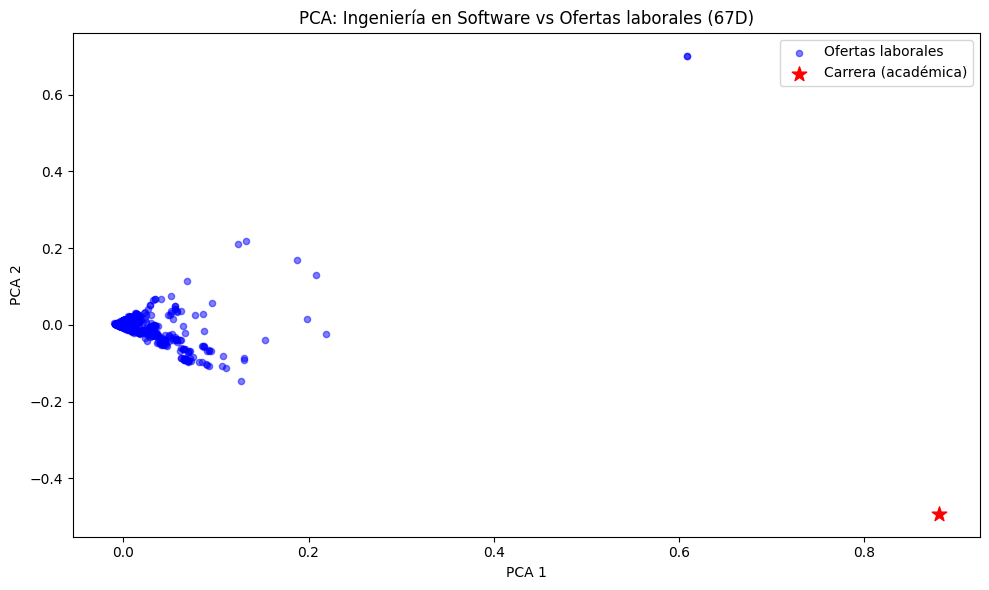

In [ ]:
# Visualización PCA: Ingeniería en Software vs Ofertas laborales en Software (67 dimensiones)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
# Vector académico de la carrera
vector_carrera_sw = tfidf_epn_67d.T.loc[["Ingenieria En Software"]]
# Cargar ofertas laborales de software y vectorizarlas en 67 dimensiones
ruta_sw = "todas_las_plataformas/Software/Software_Merged.csv"
df_sw = pd.read_csv(ruta_sw, dtype=str)
textos_sw = df_sw[["skills","description"]].fillna("").agg(" ".join, axis=1).str.lower().tolist()
vectorizer_sw = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X_sw = vectorizer_sw.transform(textos_sw)
matriz_td_sw = pd.DataFrame(X_sw.T.toarray(), index=vectorizer_sw.get_feature_names_out())
matriz_sw_67d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=range(len(textos_sw)))
for label, terms in grupos_bge_ngram.items():
    matriz_sw_67d.loc[label] = matriz_td_sw.loc[terms].sum(axis=0)
matriz_sw_67d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
tfidf_transformer_sw = TfidfTransformer(norm='l2').fit(matriz_sw_67d.values)
tfidf_sw_67d = pd.DataFrame(tfidf_transformer_sw.transform(matriz_sw_67d.values).toarray(), index=matriz_sw_67d.index, columns=matriz_sw_67d.columns).T
# Unir carrera y ofertas laborales
df_pca_sw = pd.concat([vector_carrera_sw, tfidf_sw_67d], ignore_index=True)
# PCA a 2 dimensiones
pca_sw = PCA(n_components=2)
pca_result_sw = pca_sw.fit_transform(df_pca_sw.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result_sw[1:,0], pca_result_sw[1:,1], c='blue', label='Ofertas laborales', s=20, alpha=0.5)
plt.scatter(pca_result_sw[0,0], pca_result_sw[0,1], c='red', label='Carrera (académica)', s=120, marker='*')
plt.legend()
plt.title('PCA: Ingeniería en Software vs Ofertas laborales (67D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

In [ ]:
# Distancia promedio entre vector académico y ofertas laborales (Software)
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import numpy as np
vector_carrera_sw = tfidf_epn_67d.T.loc[["Ingenieria En Software"]].values
vectores_ofertas_sw = tfidf_sw_67d.values
distancias_coseno_sw = cosine_distances(vector_carrera_sw, vectores_ofertas_sw)[0]
distancia_promedio_coseno_sw = np.mean(distancias_coseno_sw)
distancias_euclideana_sw = euclidean_distances(vector_carrera_sw, vectores_ofertas_sw)[0]
distancia_promedio_euclideana_sw = np.mean(distancias_euclideana_sw)
print(f"Distancia promedio coseno: {distancia_promedio_coseno_sw:.4f}")
print(f"Distancia promedio euclideana: {distancia_promedio_euclideana_sw:.4f}")

Distancia promedio coseno: 0.9653
Distancia promedio euclideana: 1.1211


- **Distancia promedio coseno:** El vector académico y los vectores de ofertas laborales tienen direcciones muy diferentes (habilidades técnicas poco coincidentes).
- **Distancia promedio euclideana:** La magnitud total de las habilidades técnicas presentes también muestra una diferencia considerable.

El perfil académico de Ingeniería en Software está poco alineado con lo que se demanda en las ofertas laborales, tanto en el tipo como en la cantidad de habilidades técnicas.

#### Comparación PCA: Ciencias de Datos e Inteligencia Artificial vs Mercado laboral
En este gráfico PCA se compara el vector académico de "Ciencias De Datos E Inteligencia Artificial" con los vectores de ofertas laborales obtenidos de los archivos "Ciencia_de_Datos_Merged.csv" y "Software_Merged.csv". La estrella roja representa el perfil académico y los puntos azules las ofertas laborales, permitiendo analizar la alineación entre la formación académica y la demanda laboral en estas áreas.

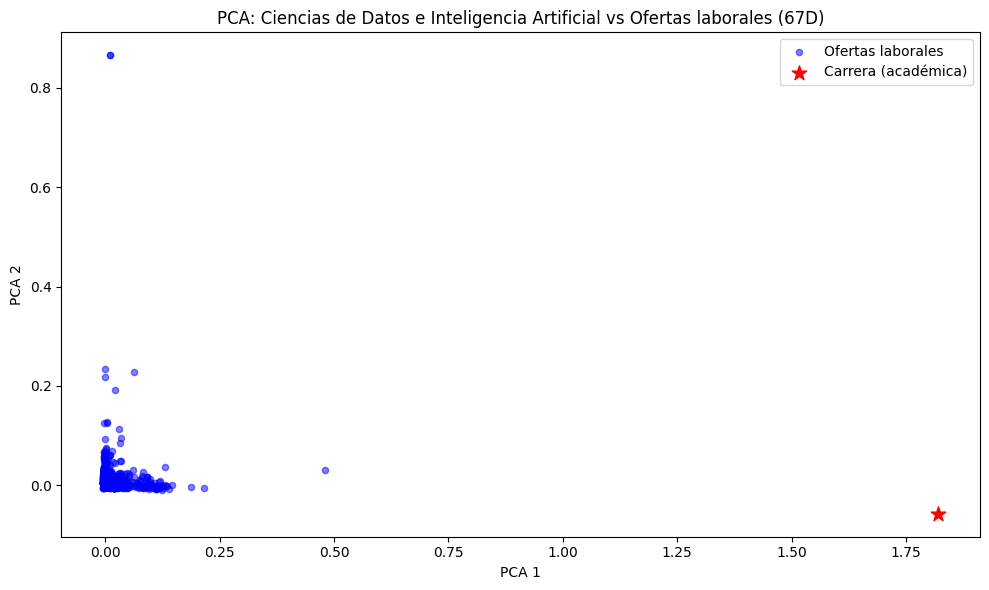

In [ ]:
# Visualización PCA: Ciencias de Datos e Inteligencia Artificial vs Ofertas laborales (67 dimensiones)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
# Vector académico de la carrera
vector_carrera_cda = tfidf_epn_67d.T.loc[["Ciencias De Datos E Inteligencia Artificial"]]
# Cargar ofertas laborales de Ciencia de Datos y Software y vectorizarlas en 67 dimensiones
ruta_cd = "todas_las_plataformas/Ciencia_de_Datos/Ciencia_de_Datos_Merged.csv"
ruta_sw = "todas_las_plataformas/Software/Software_Merged.csv"
df_cd = pd.read_csv(ruta_cd, dtype=str)
df_sw = pd.read_csv(ruta_sw, dtype=str)
textos_cd = df_cd[["skills","description"]].fillna("").agg(" ".join, axis=1).str.lower().tolist()
textos_sw = df_sw[["skills","description"]].fillna("").agg(" ".join, axis=1).str.lower().tolist()
textos_ofertas = textos_cd + textos_sw
vectorizer_ofertas = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X_ofertas = vectorizer_ofertas.transform(textos_ofertas)
matriz_td_ofertas = pd.DataFrame(X_ofertas.T.toarray(), index=vectorizer_ofertas.get_feature_names_out())
matriz_ofertas_67d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=range(len(textos_ofertas)))
for label, terms in grupos_bge_ngram.items():
    matriz_ofertas_67d.loc[label] = matriz_td_ofertas.loc[terms].sum(axis=0)
matriz_ofertas_67d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
tfidf_transformer_ofertas = TfidfTransformer(norm='l2').fit(matriz_ofertas_67d.values)
tfidf_ofertas_67d = pd.DataFrame(tfidf_transformer_ofertas.transform(matriz_ofertas_67d.values).toarray(), index=matriz_ofertas_67d.index, columns=matriz_ofertas_67d.columns).T
# Unir carrera y ofertas laborales
df_pca_cda = pd.concat([vector_carrera_cda, tfidf_ofertas_67d], ignore_index=True)
# PCA a 2 dimensiones
pca_cda = PCA(n_components=2)
pca_result_cda = pca_cda.fit_transform(df_pca_cda.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result_cda[1:,0], pca_result_cda[1:,1], c='blue', label='Ofertas laborales', s=20, alpha=0.5)
plt.scatter(pca_result_cda[0,0], pca_result_cda[0,1], c='red', label='Carrera (académica)', s=120, marker='*')
plt.legend()
plt.title('PCA: Ciencias de Datos e Inteligencia Artificial vs Ofertas laborales (67D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

In [ ]:
# Distancia promedio entre vector académico y ofertas laborales (Ciencias de Datos e IA)
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import numpy as np
vector_carrera_cda = tfidf_epn_67d.T.loc[["Ciencias De Datos E Inteligencia Artificial"]].values
vectores_ofertas_cda = tfidf_ofertas_67d.values
distancias_coseno_cda = cosine_distances(vector_carrera_cda, vectores_ofertas_cda)[0]
distancia_promedio_coseno_cda = np.mean(distancias_coseno_cda)
distancias_euclideana_cda = euclidean_distances(vector_carrera_cda, vectores_ofertas_cda)[0]
distancia_promedio_euclideana_cda = np.mean(distancias_euclideana_cda)
print(f"Distancia promedio coseno: {distancia_promedio_coseno_cda:.4f}")
print(f"Distancia promedio euclideana: {distancia_promedio_euclideana_cda:.4f}")

Distancia promedio coseno: 0.9301
Distancia promedio euclideana: 1.8426


#### Comparación PCA: Ingeniería en Sistemas de Información vs Mercado laboral
En este gráfico PCA se compara el vector académico de "Ingeniería en Sistemas de Información" con los vectores de ofertas laborales obtenidos de "Sistemas_de_Información_Merged.csv". La estrella roja representa el perfil académico y los puntos azules las ofertas laborales, permitiendo analizar la alineación entre la formación académica y la demanda laboral en el área de Sistemas de Información.

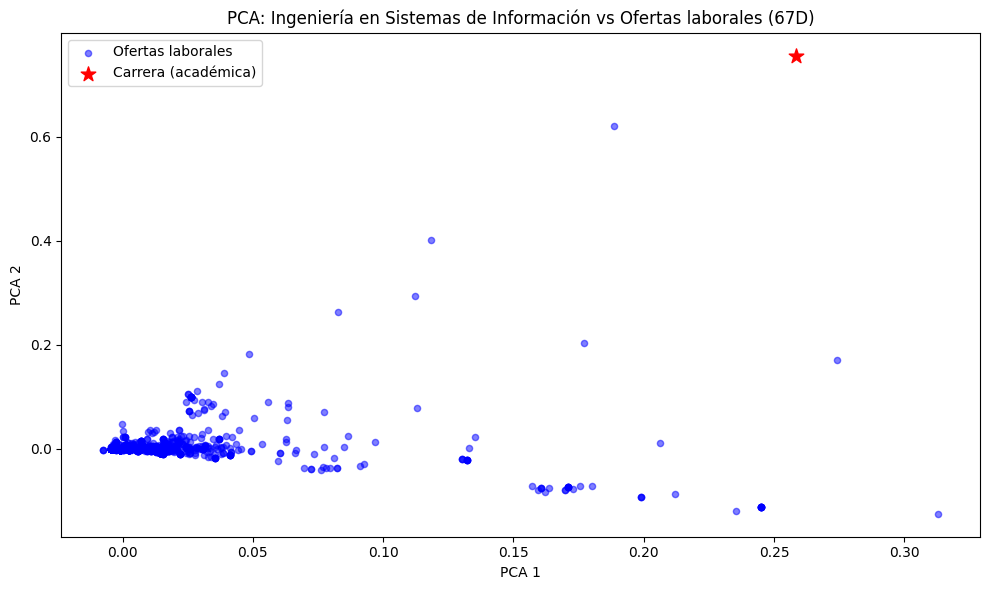

In [ ]:
# Visualización PCA: Ingeniería en Sistemas de Información vs Ofertas laborales (67 dimensiones)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
# Vector académico de la carrera
vector_carrera_si = tfidf_epn_67d.T.loc[["Ingenieria En Sistemas De Informacion"]]
# Cargar ofertas laborales de Sistemas de Información y vectorizarlas en 67 dimensiones
ruta_si = "todas_las_plataformas/Sistemas_de_Información/Sistemas_de_Información_Merged.csv"
df_si = pd.read_csv(ruta_si, dtype=str)
textos_si = df_si[["skills","description"]].fillna("").agg(" ".join, axis=1).str.lower().tolist()
vectorizer_si = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X_si = vectorizer_si.transform(textos_si)
matriz_td_si = pd.DataFrame(X_si.T.toarray(), index=vectorizer_si.get_feature_names_out())
matriz_si_67d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=range(len(textos_si)))
for label, terms in grupos_bge_ngram.items():
    matriz_si_67d.loc[label] = matriz_td_si.loc[terms].sum(axis=0)
matriz_si_67d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
tfidf_transformer_si = TfidfTransformer(norm='l2').fit(matriz_si_67d.values)
tfidf_si_67d = pd.DataFrame(tfidf_transformer_si.transform(matriz_si_67d.values).toarray(), index=matriz_si_67d.index, columns=matriz_si_67d.columns).T
# Unir carrera y ofertas laborales
df_pca_si = pd.concat([vector_carrera_si, tfidf_si_67d], ignore_index=True)
# PCA a 2 dimensiones
pca_si = PCA(n_components=2)
pca_result_si = pca_si.fit_transform(df_pca_si.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result_si[1:,0], pca_result_si[1:,1], c='blue', label='Ofertas laborales', s=20, alpha=0.5)
plt.scatter(pca_result_si[0,0], pca_result_si[0,1], c='red', label='Carrera (académica)', s=120, marker='*')
plt.legend()
plt.title('PCA: Ingeniería en Sistemas de Información vs Ofertas laborales (67D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

In [ ]:
# Distancia promedio entre vector académico y ofertas laborales (Sistemas de Información)
vector_carrera_si = tfidf_epn_67d.T.loc[["Ingenieria En Sistemas De Informacion"]].values
vectores_ofertas_si = tfidf_ofertas_67d.values
distancias_coseno_si = cosine_distances(vector_carrera_si, vectores_ofertas_si)[0]
distancia_promedio_coseno_si = np.mean(distancias_coseno_si)
distancias_euclideana_si = euclidean_distances(vector_carrera_si, vectores_ofertas_si)[0]
distancia_promedio_euclideana_si = np.mean(distancias_euclideana_si)
print(f"Distancia promedio coseno: {distancia_promedio_coseno_si:.4f}")
print(f"Distancia promedio euclideana: {distancia_promedio_euclideana_si:.4f}")

Distancia promedio coseno: 0.9946
Distancia promedio euclideana: 0.9490


- **Distancia promedio coseno:** Las habilidades técnicas enseñadas y las requeridas en el mercado laboral coinciden muy poco.
- **Distancia promedio euclideana:** La cantidad total de habilidades técnicas presentes en ambos perfiles es también bastante diferente.

Existe una *desalineación significativa* entre el perfil académico y las ofertas laborales para esa carrera. Las competencias técnicas enseñadas no corresponden bien con las que demanda el mercado laboral.